# 02467 Assignment 1
s204085 Cornelius Erichs & s204076 Natasha Hougaard

#### GitHub repository
Here is our repository on GitHub:


## Part 1: Using web-scraping to gather data
Gather the list of researchers that have joined the most important scientific conference in Computational Social Science in 2019.
1. Inspect the HTML of the pages above and use web-scraping to get the set of participants in 2019. Share your code and add comments to guide us through it.
2. How many unique researchers you got in 2019?
3. Explain one or two decisions you took during the web-scraping exercise, for 2019 or any other year. Why did you take this choice? How might your decision impact the final number of authors?

In [1]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re


LINK = "https://2019.ic2s2.org/oral-presentations/"
r = requests.get(LINK) 

soup = BeautifulSoup(r.content, 'html.parser') 



body = soup.find("body")
body.prettify()

content = body.find("div", {"col-md-8 page-content-wrap"})
content.prettify()

codetags = content.find_all('strong') 

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <strong> tag

codetags = content.find_all('em')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <em> tag

paragraf1 = content.find_all("p")
paragraf1

paragraf=paragraf1[3:]
paragraf


count=0
one_list=[]
for element in paragraf:
    start=[]
    end=[]
    temp=element.get_text()
    numbers=["0","1","2","3","4","5","6","7","8","9", "("]
    days = ["Thursd","Friday","Saturd"]
    alphabet = list('abcdefghijklmnopqrstuvwxyz')
    s = temp
    c = '–'
    positions = [pos for pos, char in enumerate(s) if char == c] # finding all indexes with -
    for index in positions:
        if (temp[index+2] not in numbers): # Making sure we are past the time and not between two times (ie. 11:00 - 11:30)
            if (temp[index+2:index+8] not in days): # Making sure the date is not included
                if ((temp[index-2] not in alphabet) and (temp[index+2] not in alphabet)):  # if end is - instead of .
                    #print(temp[index+2:index+8])
                    start.append(index+2)
                else:
                    end.append(index) # if end is - instead of ., we still want to add it to our dictionary
        else:
            pass
    c = '.'
    j=0
    positions = [pos for pos, char in enumerate(s) if char == c] # finding all indexes with .
    for index in positions:
        if (temp[index-2] == " "): # checking if its a middle name, ex. John H. Doe, index-2 would be a space in that case
            pass
        else:
            #print(temp[index-6:index+2])
            if(start[j]>index): # avoiding cases where we have the start index come after end index, ex. if . is in the project title
                pass
            else:
                if (temp[index-1]==")"): # avoid scenario as 11:15 - No presentation (cancelled). Name1, Name2
                    start[j]=index+2
                else:
                    end.append(index)
                    j+=1
    end.sort()
    j=0
    while(j<len(end)): # if it ends with . and the project title includes a "-" somewhere, ex. Lorem ipsum dolor - sit amet consectetur. 
       if (start[j]<end[j]):
           j+=1
       else:
           del end[j]
    for i in range(len(end)):
        print(temp[start[i]:end[i]])
        print("--------") # just for easier output reading
        strings = temp[start[i]:end[i]].replace(" and",",") # removing the and from ex. "John Doe and Jane Doe"
        strings = strings.replace(", ",",")
        one_list.extend(strings.split(","))
    count+=1
    #if count==6:
        #break
name_dict=dict.fromkeys(one_list,0)
    
import pickle 
with open('name_dict_first.pkl', 'wb') as f:
    pickle.dump(name_dict, f) # saving all the names in a dict

Jieyu Ding, Qiusi Sun, Jingwen Zhang
--------
Mahmoudreza Babaei, Juhi Kulshrestha, Abhijnan Chakraborty, Elissa M. Redmiles, Meeyoung Cha, Krishna Gummadi
--------
Alexandre Bovet, Hernan Makse
--------
Ziv Epstein, Mohsen Mosleh, Antonio Arechar, Gordon Pennycook, David Rand
--------
Sunandan Chakraborty, Tarunima Prabhakar, Joyojeet Pal 
--------
Gustavo Jota Resende, Philipe Melo, Hugo Sousa, Johnnatan Messias, Marisa Vasconcelos, Jussara Almeida, Fabrício Benevenuto
--------
Kangsan Lee, Jaehyuk Park, Yong-Yeol Ahn
--------
Milan Janosov, Federico Battiston, Gerardo Iñiguez, Federico Musciotto
--------
Sophie Cho, Michael Mauskapf
--------
Susumu Nagayama, Hitoshi Mitsuhashi
--------
Ramona Roller, Frank Schweitzer
--------
Chao Min, Yi Bu, Jianjun Sun, Ying Ding
--------
Frank van der Wouden, Gianluca Carnabuci, Hyejin Youn
--------
George Richardson, Juan Mateos-Garcia
--------
Milad Abbasiharofteh, Tom Broekel
--------
Benjamin Meindl, Morgan R. Frank, Joana Mendonça
--------
J

The code above, gets the participants from the 2019 oral presentation (https://2019.ic2s2.org/oral-presentations/), comments are added to places of importance.

Below is the code for the poster presentations (https://2019.ic2s2.org/posters/)

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  7 19:14:54 2023

@author: Corne
"""
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re


LINK = "https://2019.ic2s2.org/posters/"
r = requests.get(LINK) 

soup = BeautifulSoup(r.content, 'html.parser') 



body = soup.find("body")
body.prettify()

content = body.find("div", {"col-md-8 page-content-wrap"})
content.prettify()

codetags = content.find_all('h1')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <h1> tag
    
codetags = content.find_all('p')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <p> tag

codetags = content.find_all('strong')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <strong> tag
    
codetags = content.find_all('h4')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <h4> tag
    
codetags = content.find_all('a')

for codetag in codetags:
    codetag.extract() # removing all text that are inside a <a> tag
strings=content.get_text()
strings=strings.replace(" and", ",")
#strings=strings.replace(",", ",,")
strings=re.sub(r'(?<=[.,])(?=[^\s])', r' ', strings) # adding spaces for easier handling
temppp=strings.splitlines() 
list2 = [x for x in temppp if x]
one_list=[]
for i in range(len(list2)):
    one_list.extend(list2[i].split(", "))
name_dict=dict.fromkeys(one_list,0)
name_dict.pop("") # removing occurence with no key

import pickle 
with open('name_dict_second.pkl', 'wb') as f:
    pickle.dump(name_dict, f)


The amount of unique research in 2019 was:

In [3]:
with open('name_dict_first.pkl', 'rb') as f:
    first_dict = pickle.load(f)
with open('name_dict_second.pkl', 'rb') as f:
    second_dict = pickle.load(f)
total_dict_dup = {**first_dict, **second_dict}
print(f"Amount of unique researchers: {len(total_dict_dup): .0f}")

Amount of unique researchers:  947


The structure of the websites were not consistent, and therefore unable to easily obtain the names without some strategy.

For the first website, the oral presentation, the website followed a structure where the names came after a time period, and then followed by the project title. With this, it was possible to search for the end time by searching for "-" character and checking what came before and after it.

For the second website, the poster presentation, it was easiset just to remove all the text we didn't need, as the unwanted text was inside different tags that could be removed, with this we would end up with the names we needed.

## Part 2: Getting data from the Semantic Scholar API
1. Share the number of authors you will use as starting point in this exercises. Add a comment clarifying how many IC2S2 editions you included and if the collaborators were included or not.
2. Share the code you have used to solve the exercise above.
3. How long is your final Author dataframe? How long is your final Paper dataframe?

From our web scraping we got around 2457 authers. This is for all five websites across all three years. The total amount of authers including their colaborators were around 142048 across all years, with all colaborators.

In [4]:
import requests
import pickle 
import pandas as pd
import time

with open('name_dict_first.pkl', 'rb') as f:
    first_dict = pickle.load(f)
with open('name_dict_second.pkl', 'rb') as f:
    second_dict = pickle.load(f)
with open('name_dict_third.pkl', 'rb') as f:
    third_dict = pickle.load(f)
with open('name_dict_fourth.pkl', 'rb') as f:
    fourth_dict = pickle.load(f)
with open('name_dict_fifth.pkl', 'rb') as f:
    fifth_dict = pickle.load(f)

total_dict_dup = {**first_dict, **second_dict, **third_dict, **fourth_dict, **fifth_dict}

dic_keys = total_dict_dup.keys()

total_dict = {}

for keys in list(dic_keys):
    string = keys.encode("ascii", "ignore") # remove unicode
    string = string.decode() # remove unicode
    if (string[-1]== " "):
        string = string[:-1]
    if (string not in total_dict):
        total_dict[string] = 0
    else:
        pass



scholar_dict = {}

BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/search"
params = {'query':"Oren Lederman",
           "offset":0,
           "limit":1,
           "fields":"papers.authors"}
i = 0
check_dupl = set()
for keys in list(total_dict.keys()):
    if keys not in check_dupl:
        check_dupl.add(keys)
        params['query']=keys
        my_url = BASE_URL + VERSION + RESOURCE
        r = requests.get(my_url, params=params)
        request = r.json()["data"]
        if len(request)>0:
            scholar_dict[request[0]['authorId']] = keys
            for papers in request[0]['papers']:
                for authors in papers['authors']:
                    scholar_dict[authors['authorId']]=authors['name']

    i+=1    
    print(i)
    time.sleep(3)

FileNotFoundError: [Errno 2] No such file or directory: 'name_dict_third.pkl'

This code above we ran.

In [ ]:
import requests
import pickle 
import pandas as pd

with open('name_dict_first.pkl', 'rb') as f:
    first_dict = pickle.load(f)
with open('name_dict_second.pkl', 'rb') as f:
    second_dict = pickle.load(f)
with open('name_dict_third.pkl', 'rb') as f:
    third_dict = pickle.load(f)
with open('name_dict_fourth.pkl', 'rb') as f:
    fourth_dict = pickle.load(f)
with open('name_dict_fifth.pkl', 'rb') as f:
    fifth_dict = pickle.load(f)

total_dict_dup = {**first_dict, **second_dict, **third_dict, **fourth_dict, **fifth_dict}

dic_keys = total_dict_dup.keys()

total_dict = {}

for keys in list(dic_keys):
    if (keys[-1]== " "):
        keys = keys[:-1]
    if (keys not in total_dict):
        total_dict[keys] = 0
    else:
        pass


scholar_dict = {}

BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/search"
params = {'query':"Oren Lederman",
           "offset":0,
           "limit":1,
           "fields":"papers.authors,papers.externalIds,papers.title,papers.year,papers.citationCount,papers.fieldsOfStudy,papers.s2FieldsOfStudy,papers.abstract,aliases,citationCount"}
i = 0
check_dupl = set()
df1 = pd.DataFrame(columns=["authorId","name","aliases","citationCount","field"])
df2 = pd.DataFrame(columns=["paperId","title","year","externalId.DOI","citationCount","fields","authorIds"])
df3 = pd.DataFrame(columns=["paperId","abstract"])
for keys in list(total_dict.keys()):
    if keys not in check_dupl:
        check_dupl.add(keys)
        params['query']=keys
        my_url = BASE_URL + VERSION + RESOURCE
        r = requests.get(my_url, params=params)
        request = r.json()["data"]

        if len(request)>0:
            fieldsofstudy={}
            for papers in request[0]['papers']:
                for fields in papers['s2FieldsOfStudy']:
                    if fields['category'] in fieldsofstudy:
                        fieldsofstudy[fields['category']]+=1
                    else:
                        fieldsofstudy[fields['category']]=1
            df1_row = [request[0]['authorId'], keys,request[0]['aliases'][0],request[0]['citationCount'],max(fieldsofstudy)]
            df1.loc[len(df1)] = df1_row
            for papers in request[0]['papers']:
                ids=[]
                df3_row = [papers['paperId'],papers['abstract']]
                df3.loc[len(df3)] = df3_row
                for authors in papers['authors']:
                    ids.append(authors['authorId'])
                    scholar_dict[authors['authorId']]=authors['name']
                df2_row = [papers['paperId'],papers['title'],papers['year'],papers['externalIds']['DOI'],papers['citationCount'],papers['s2FieldsOfStudy'][0]['category'],ids]
                df2.loc[len(df2)] = df2_row
    i+=1    
    print(i)
    break

This code above we did not run, because it would take several days to do so. Due to the request rate limit. We had to run 142000 names and it could only take 100 request per our. So it would take about 5 days. 

#### From now on we will use the provided dataset from '2019.pkl'

In [5]:
import pickle 
import pandas as pd

PATH = r"C:\Users\Corne\Downloads\shared_data\paper_subset\2019.pkl"

with open(PATH, 'rb') as f:
    dictonary_2019 = pickle.load(f)
    
df_2019 = pd.DataFrame(dictonary_2019)

temp = []
for i in (df_2019.loc[:,'authorIds']):
    temp.extend(i)

print(f"The amount of unique authors in the 2019 subset: {len(list(set(temp))): .0f}")
print(f"The amount of papers in the 2019 subset: {len(df_2019): .0f}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Corne\\Downloads\\shared_data\\paper_subset\\2019.pkl'

In this dataset the final lengths of the dataframes are

Unique authers: 50030

Unique papers: 153325

## Part 3: Law of large numbers
First we follow point 2-8 for all kinds of distributions.

### Gaussian Distribution

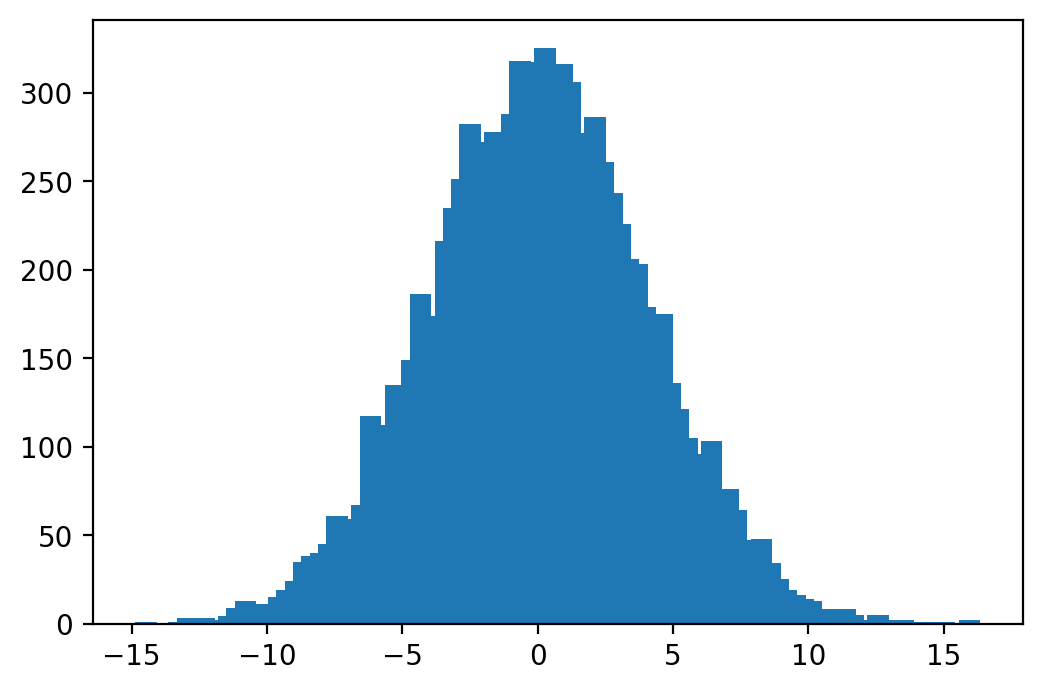

0.03995343146903968

In [6]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup_mpl():
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()
np.random.seed(1)

mu = 0
sigma = 4
distribution = mu + sigma *np.random.standard_normal(size=10000)

bins = np.linspace(-15,15,100)

hist, edges = np.histogram(distribution,bins=100)

x=(edges[1:]+edges[:-1])/2


fig,ax=plt.subplots(dpi=200)
ax.bar(x,hist)
plt.show()

df_x = pd.DataFrame(distribution)
mean = df_x.expanding().mean()
sem = df_x.expanding().sem()
median = df_x.expanding().median()
dist_median=df_x.median(axis=0)

x_axis = np.linspace(0,10000,10000)
stats.sem(distribution)


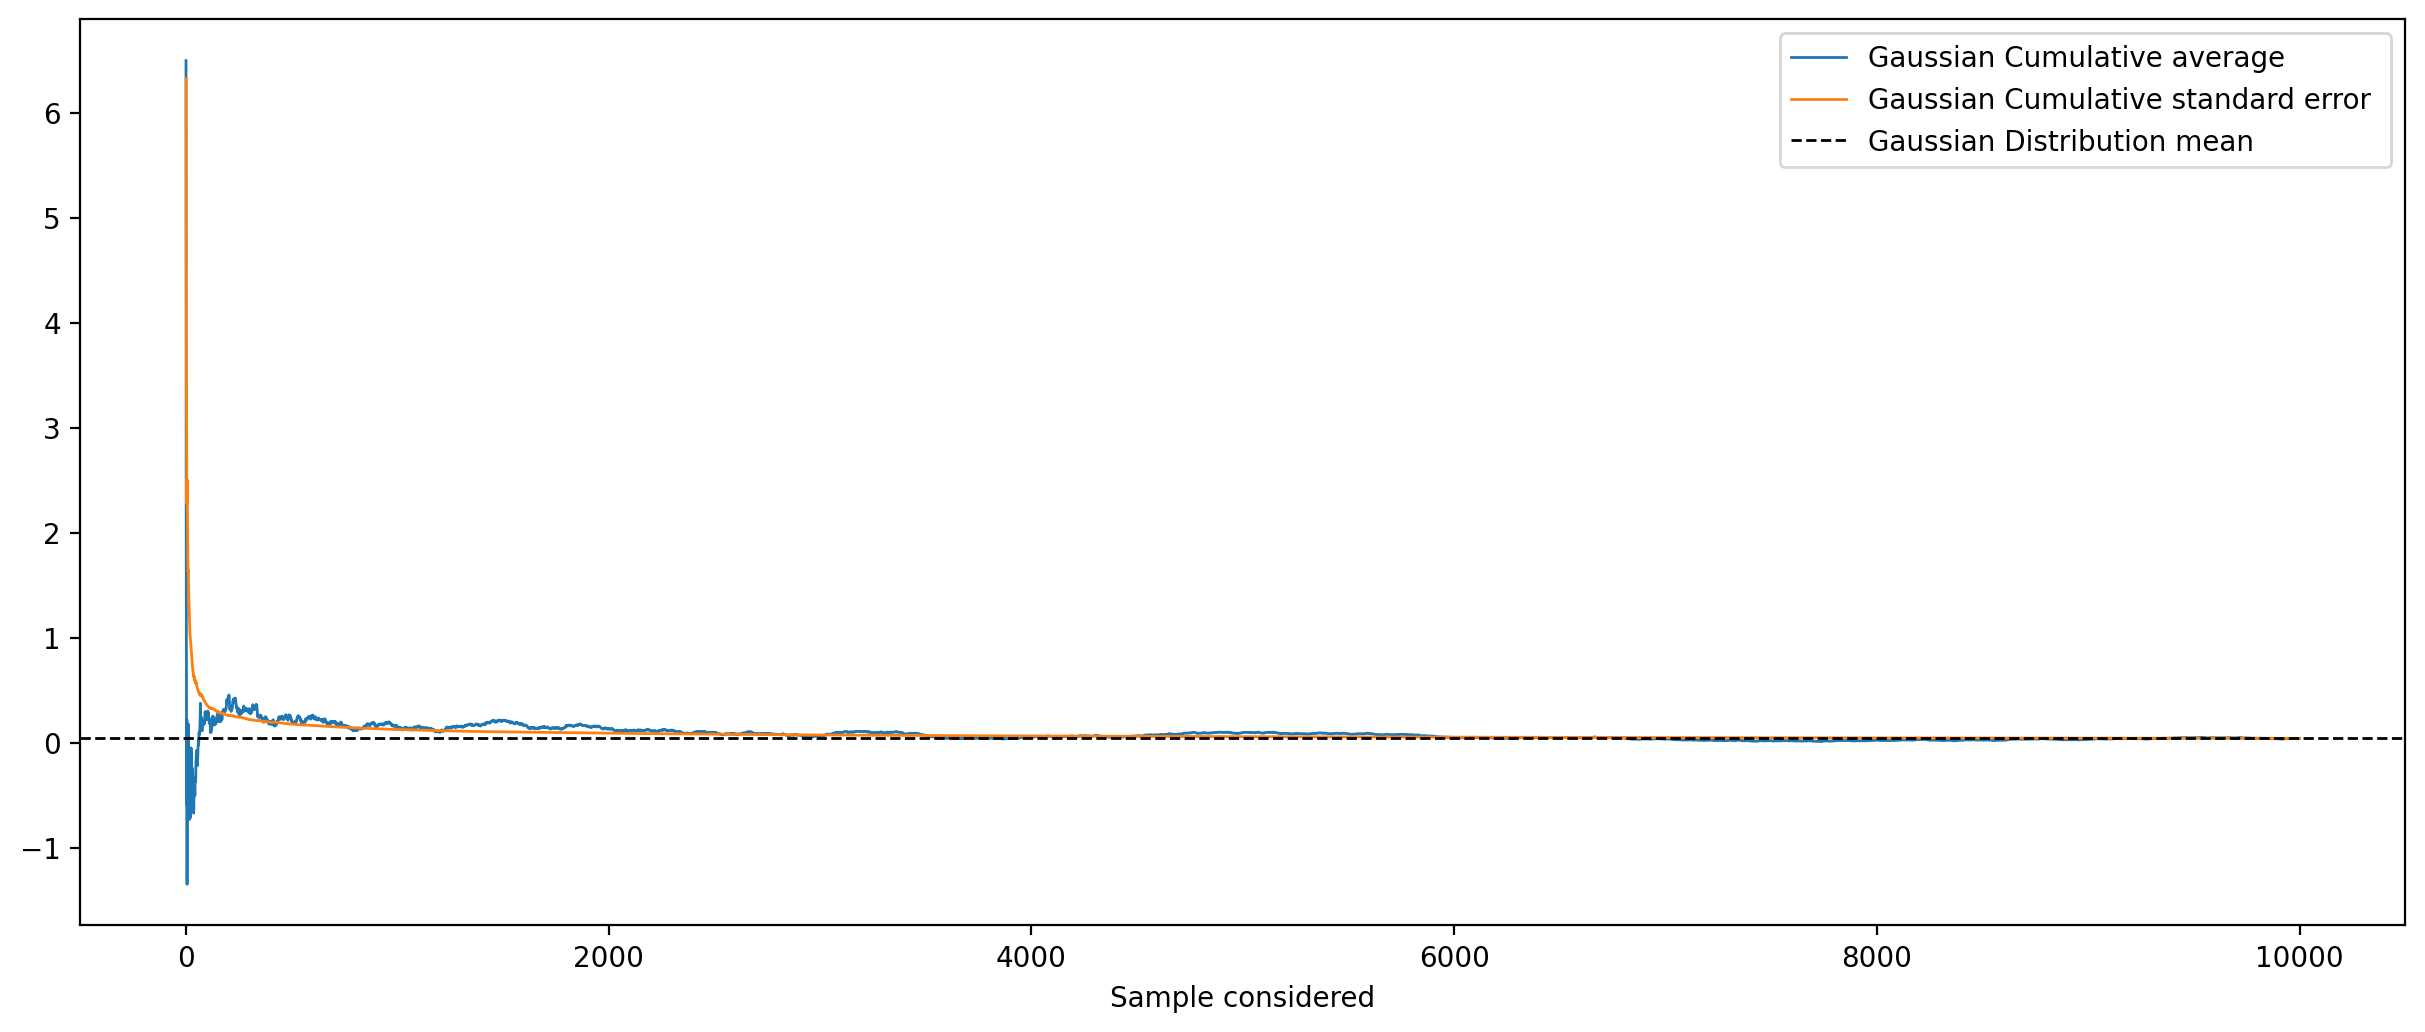

In [7]:
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,mean,label="Gaussian Cumulative average")
ax.plot(x_axis,sem,label="Gaussian Cumulative standard error ")
ax.axhline(distribution.mean(), color='k', linestyle='dashed', linewidth=1,label="Gaussian Distribution mean")
ax.set_xlabel("Sample considered")
ax.legend()
plt.show()

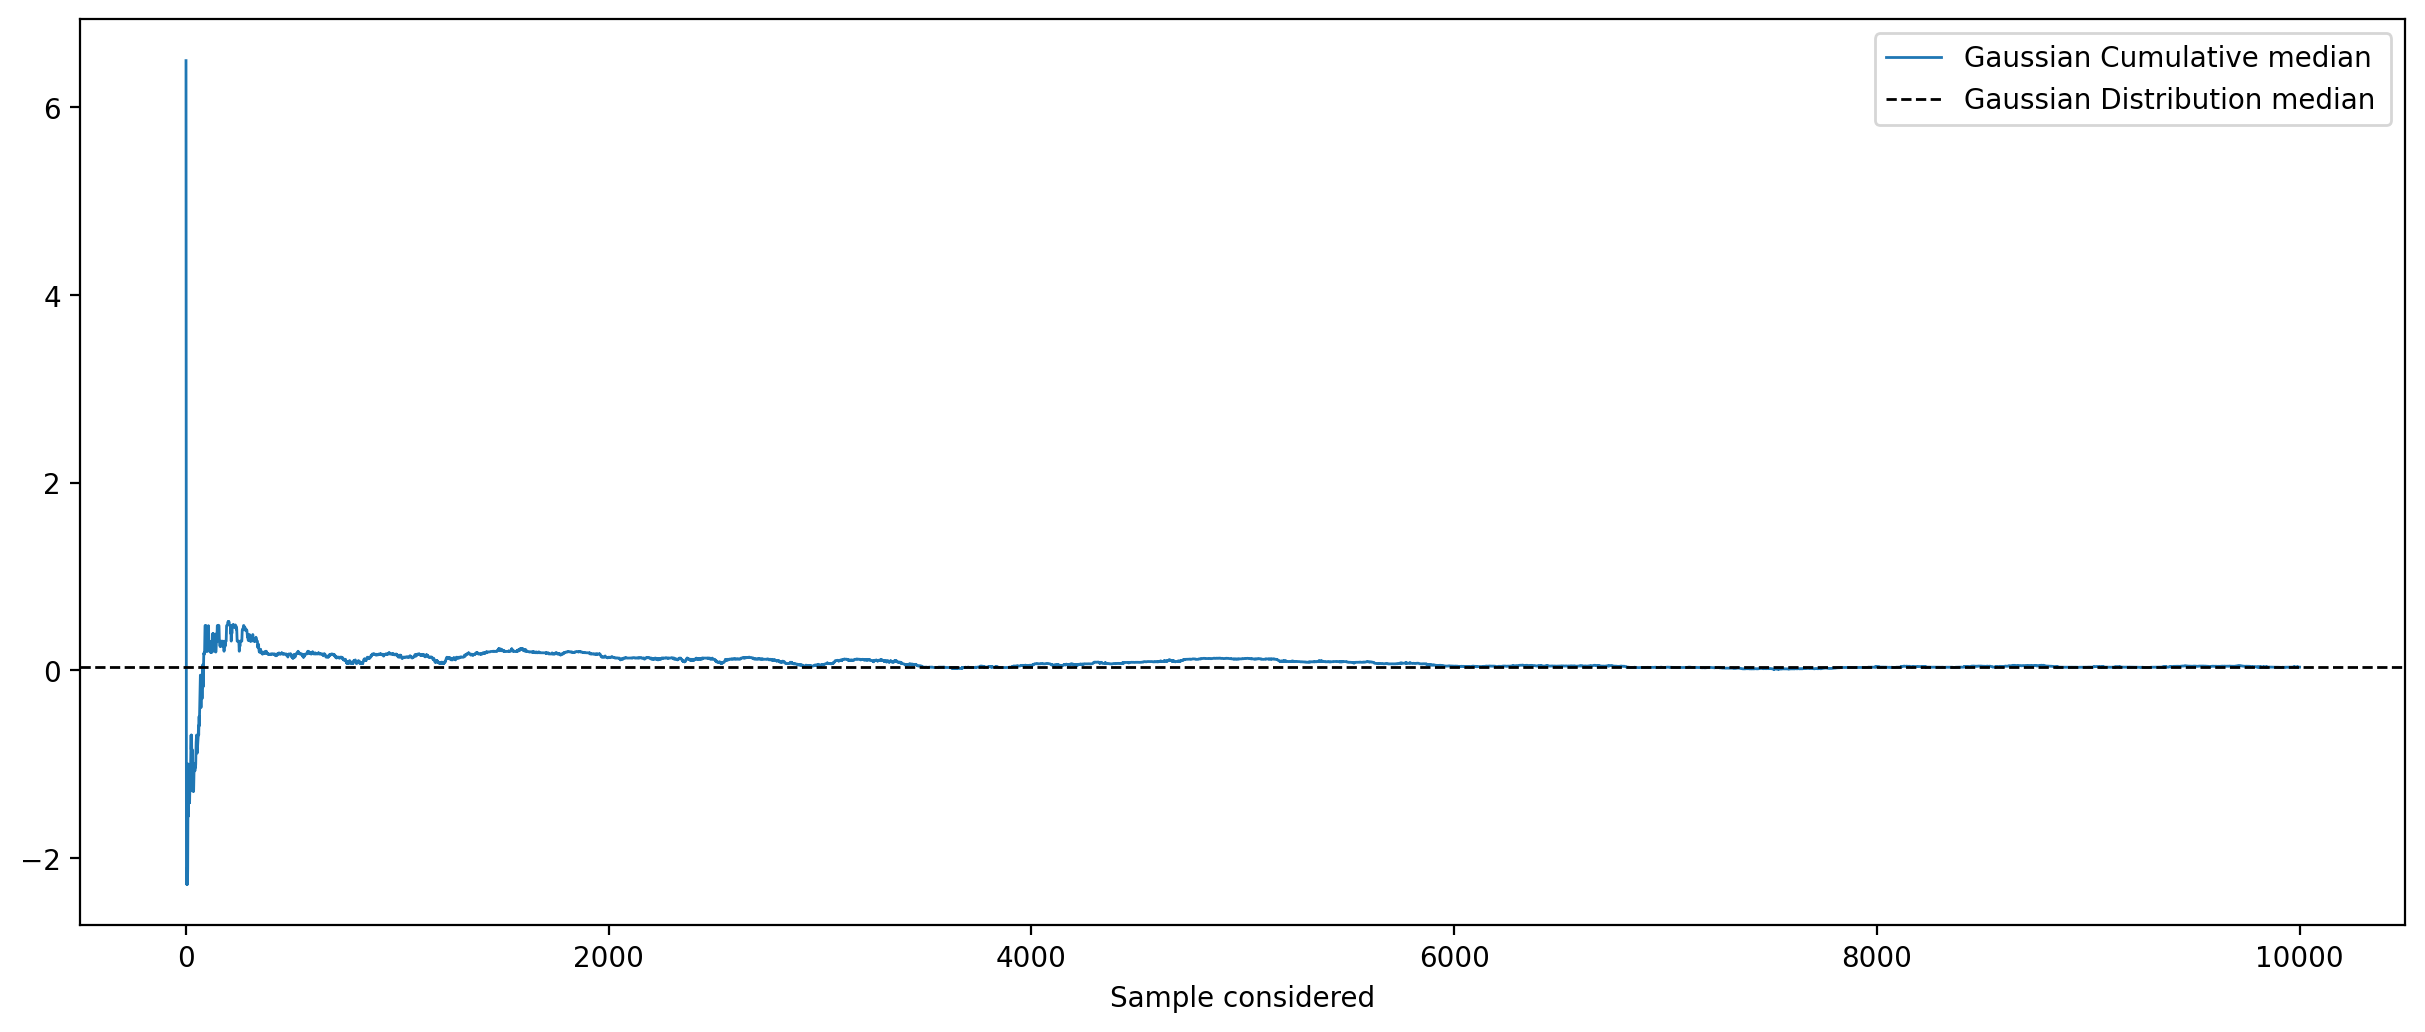

In [8]:
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,median,label="Gaussian Cumulative median ")
ax.axhline(dist_median[0], color='k', linestyle='dashed', linewidth=1,label="Gaussian Distribution median")
ax.set_xlabel("Sample considered")
ax.legend()
plt.show()

### Pareto Distribution

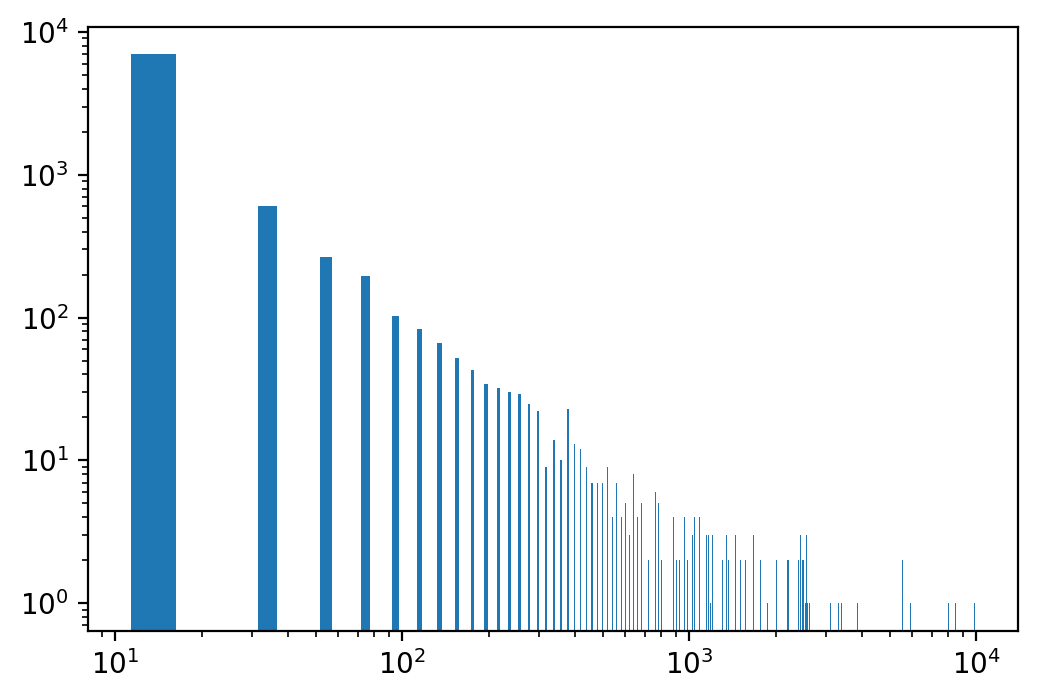

4.0

In [9]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(1)
a, m = 0.5, 1  # shape and mode

P = (np.random.pareto(a, 10000) + 1) * m

# Plot
bins = np.linspace(-100,10000,500)

hist, edges = np.histogram(P,bins=bins)
width = bins[1]-bins[0]
x=(edges[1:]+edges[:-1])/2

fig,ax=plt.subplots(dpi=200)
ax.bar(x,hist,align='edge',width=5)
#ax.plot(x,hist,marker='.')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

# Compute the mean and standard deviation of the Pareto distribution using the scipy.stats module
P_df = pd.DataFrame(P)
pareto_mean = P_df.expanding().mean()
pareto_sem = P_df.expanding().sem()
pareto_median = P_df.expanding().median()

mean_p = pareto.mean(P,scale=m).mean()

median_p = m * (2**(1/a))
median_p

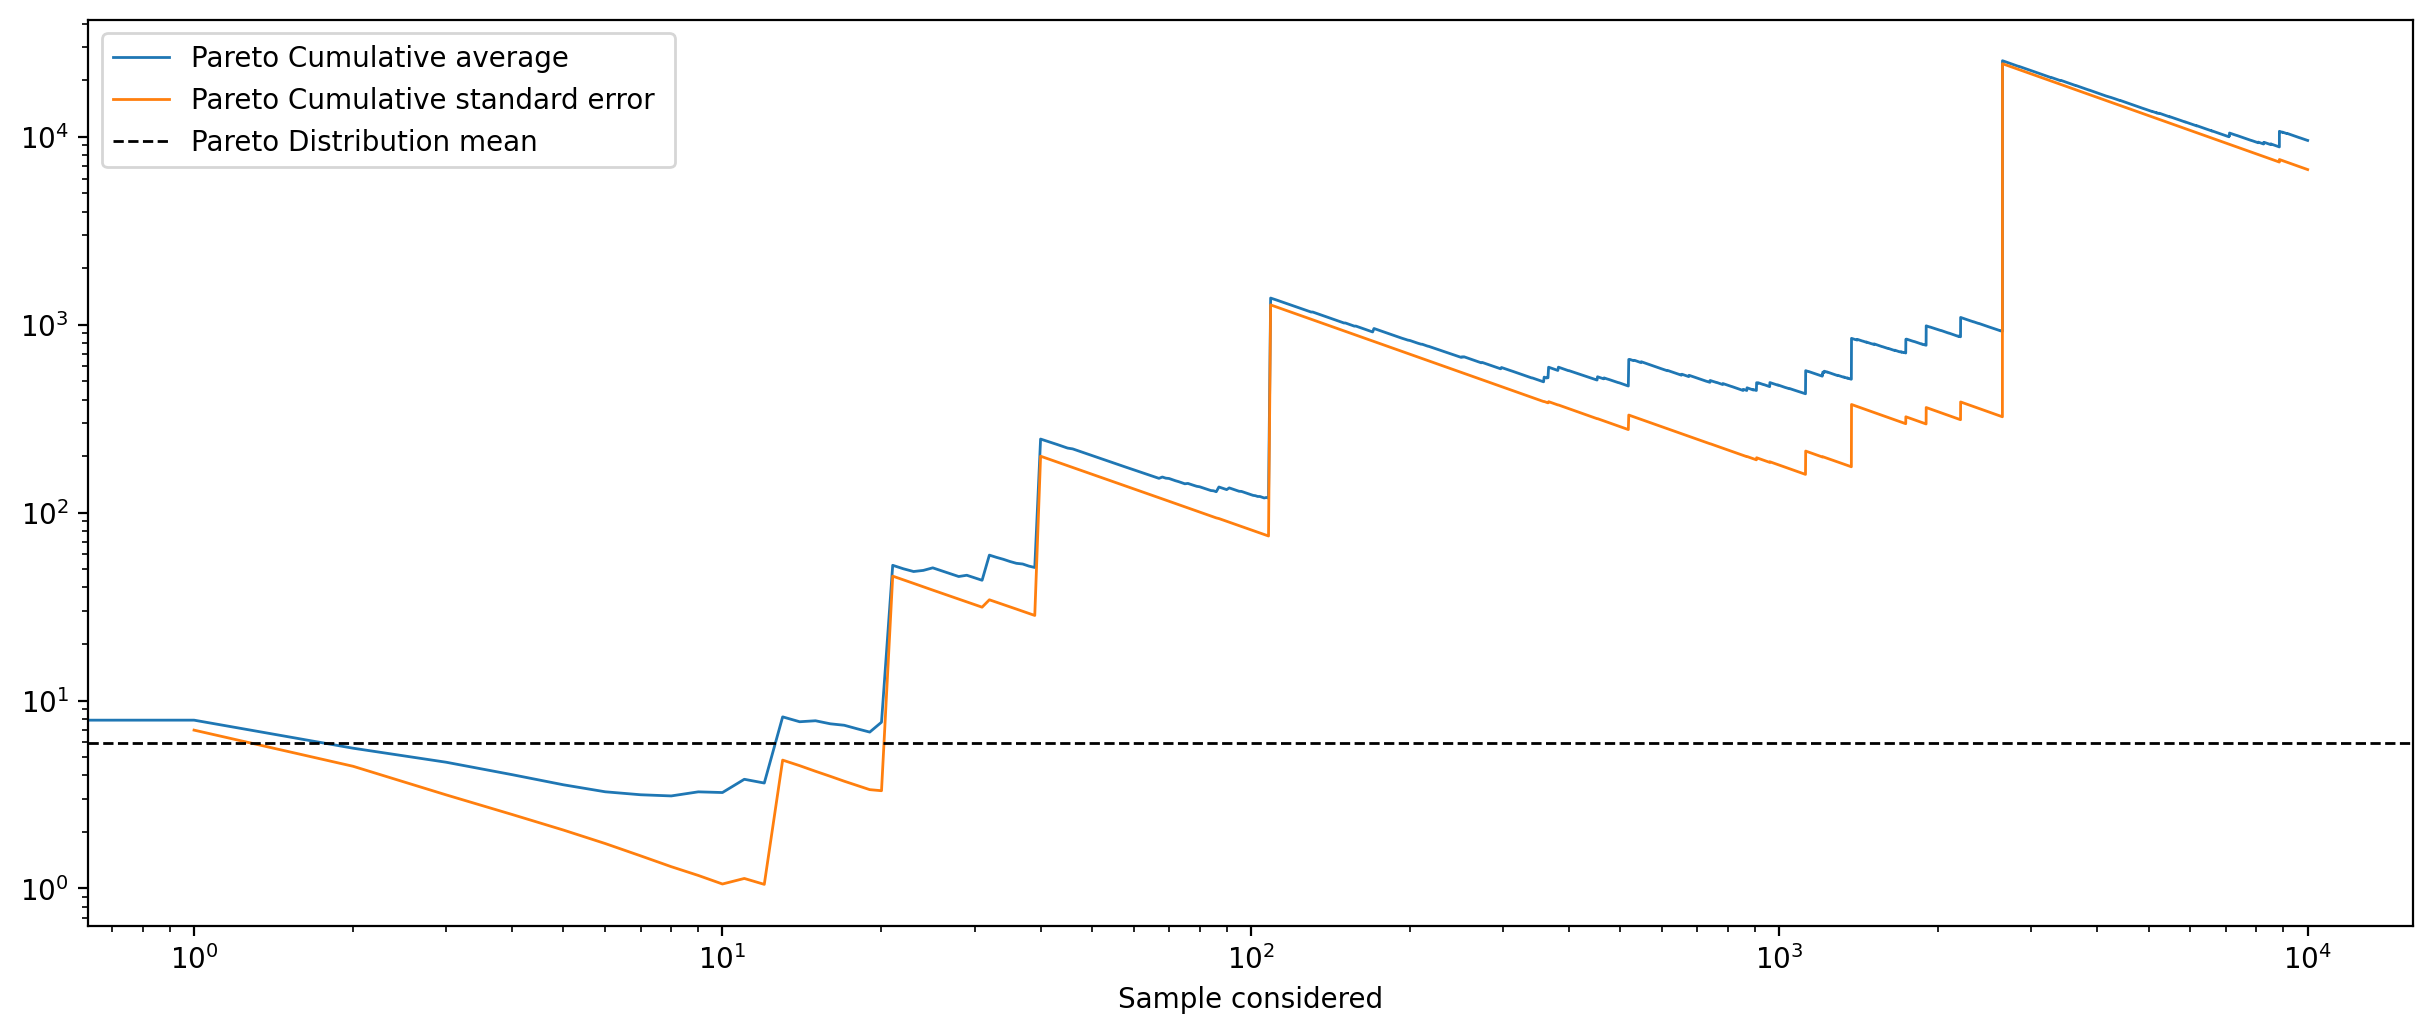

In [10]:
x_axis = np.linspace(0,10000,10000)
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,pareto_mean,label="Pareto Cumulative average")
ax.plot(x_axis,pareto_sem,label="Pareto Cumulative standard error ")
ax.axhline(mean_p, color='k', linestyle='dashed', linewidth=1, label="Pareto Distribution mean")
ax.set_xlabel("Sample considered")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()

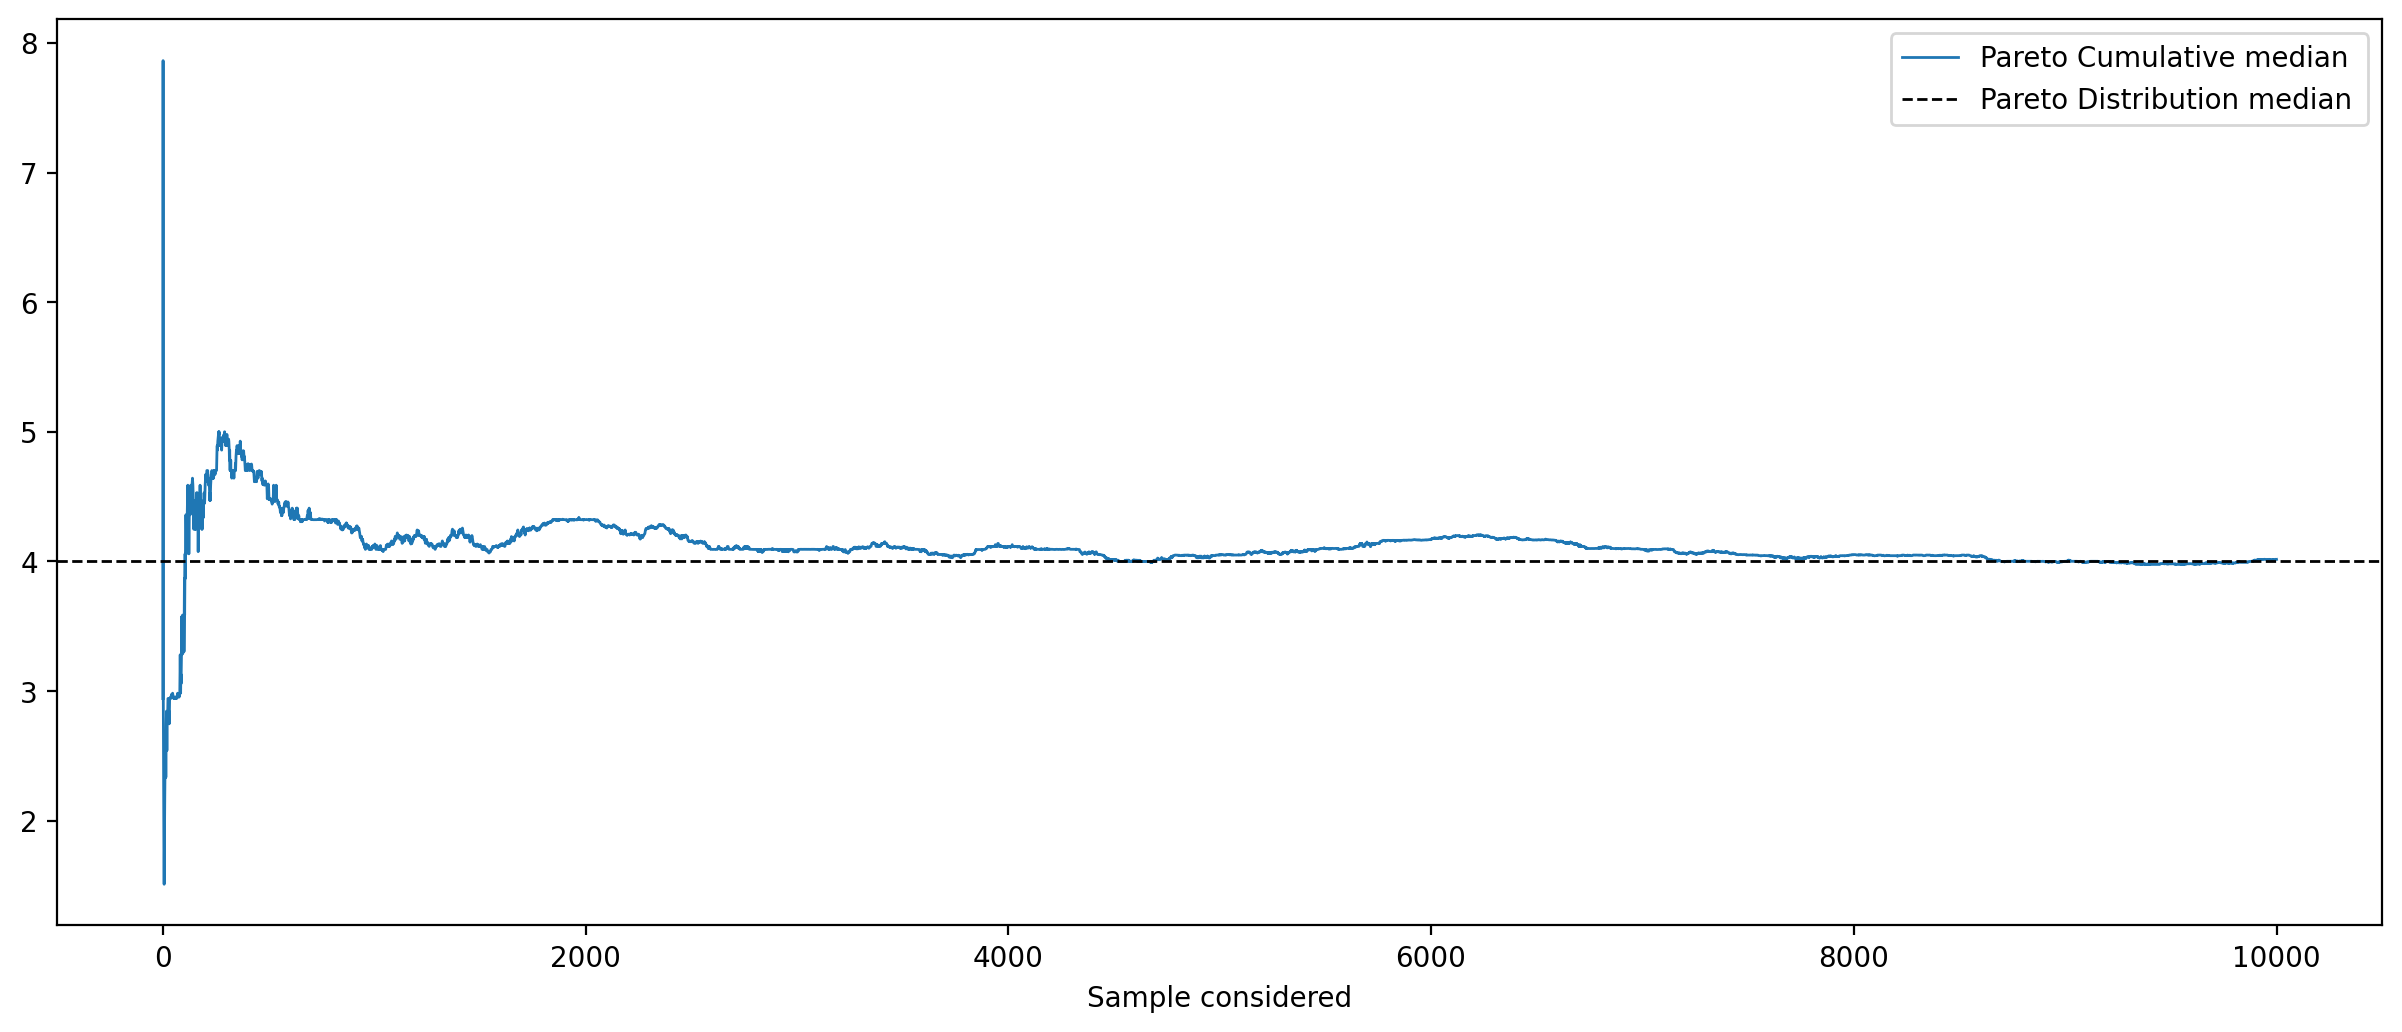

In [11]:
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,pareto_median,label="Pareto Cumulative median ")
ax.axhline(median_p, color='k', linestyle='dashed', linewidth=1,label="Pareto Distribution median")
ax.set_xlabel("Sample considered")
ax.legend()
plt.show()

### LogNormal Distribution

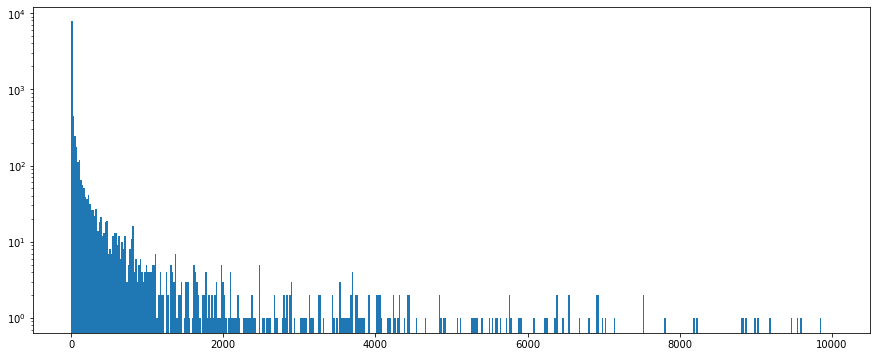

In [12]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

mu = 0
sigma = 4
L = np.random.lognormal(mu, sigma, 10000)
bins = np.linspace(0,10000,500)
# Plot
plt.figure(figsize=(15,6))
x = np.linspace(min(bins), max(bins), 500)
count, bins, ignored = plt.hist(L, bins=x)
plt.yscale('log')
plt.axis('tight')
plt.show()

# Compute the mean and standard deviation of the LogNormal distribution using the scipy.stats module
L_df = pd.DataFrame(L)
log_mean = L_df.expanding().mean()
log_sem = L_df.expanding().sem()
log_median = L_df.expanding().median()

mean_L = np.exp(mu+(sigma/2))

median_L = np.exp(mu)

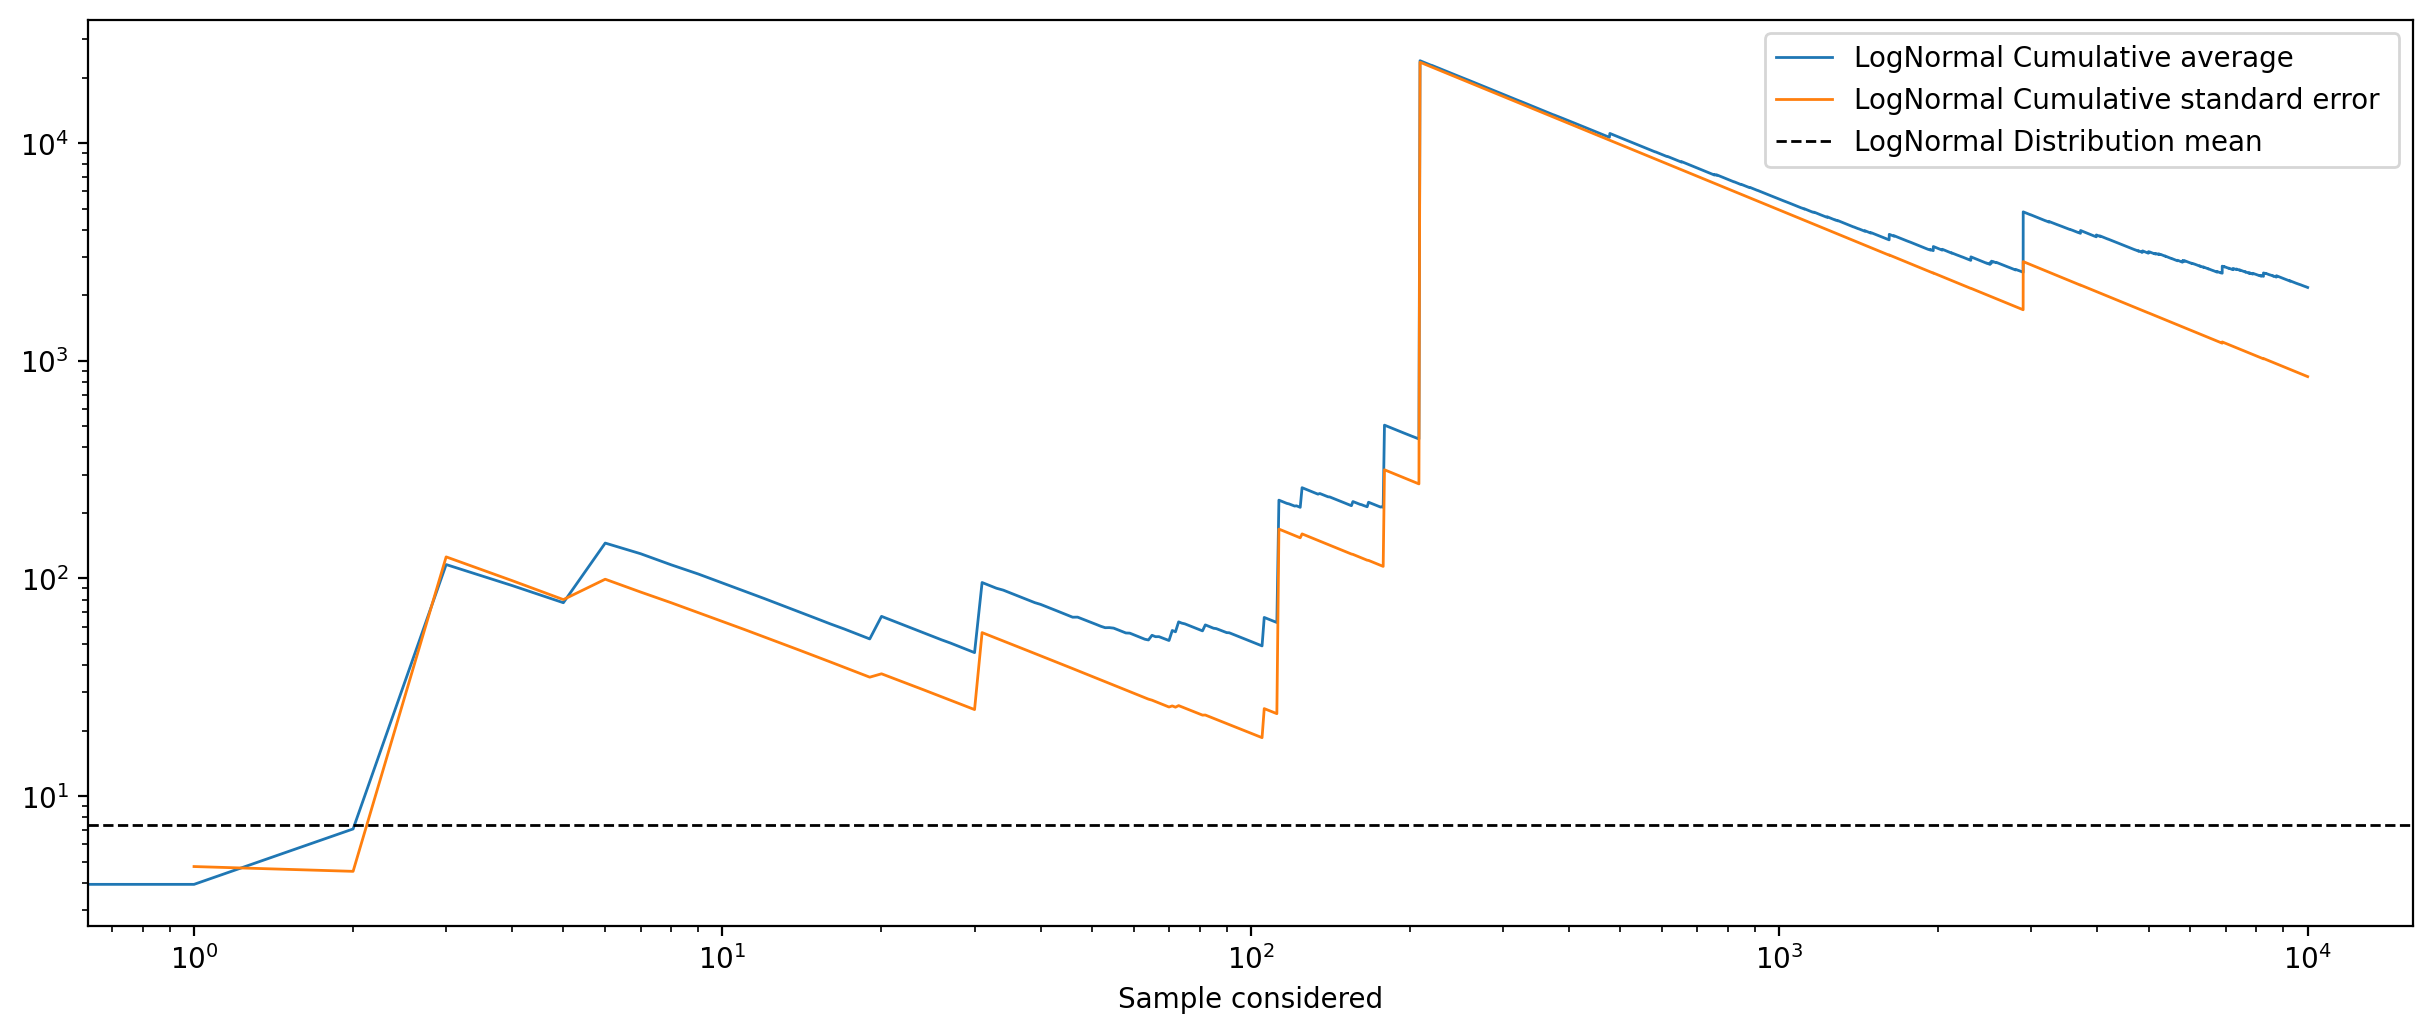

In [13]:
x_axis = np.linspace(0,10000,10000)
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,log_mean,label="LogNormal Cumulative average")
ax.plot(x_axis,log_sem,label="LogNormal Cumulative standard error ")
ax.axhline(mean_L, color='k', linestyle='dashed', linewidth=1, label="LogNormal Distribution mean")
ax.set_xlabel("Sample considered")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()

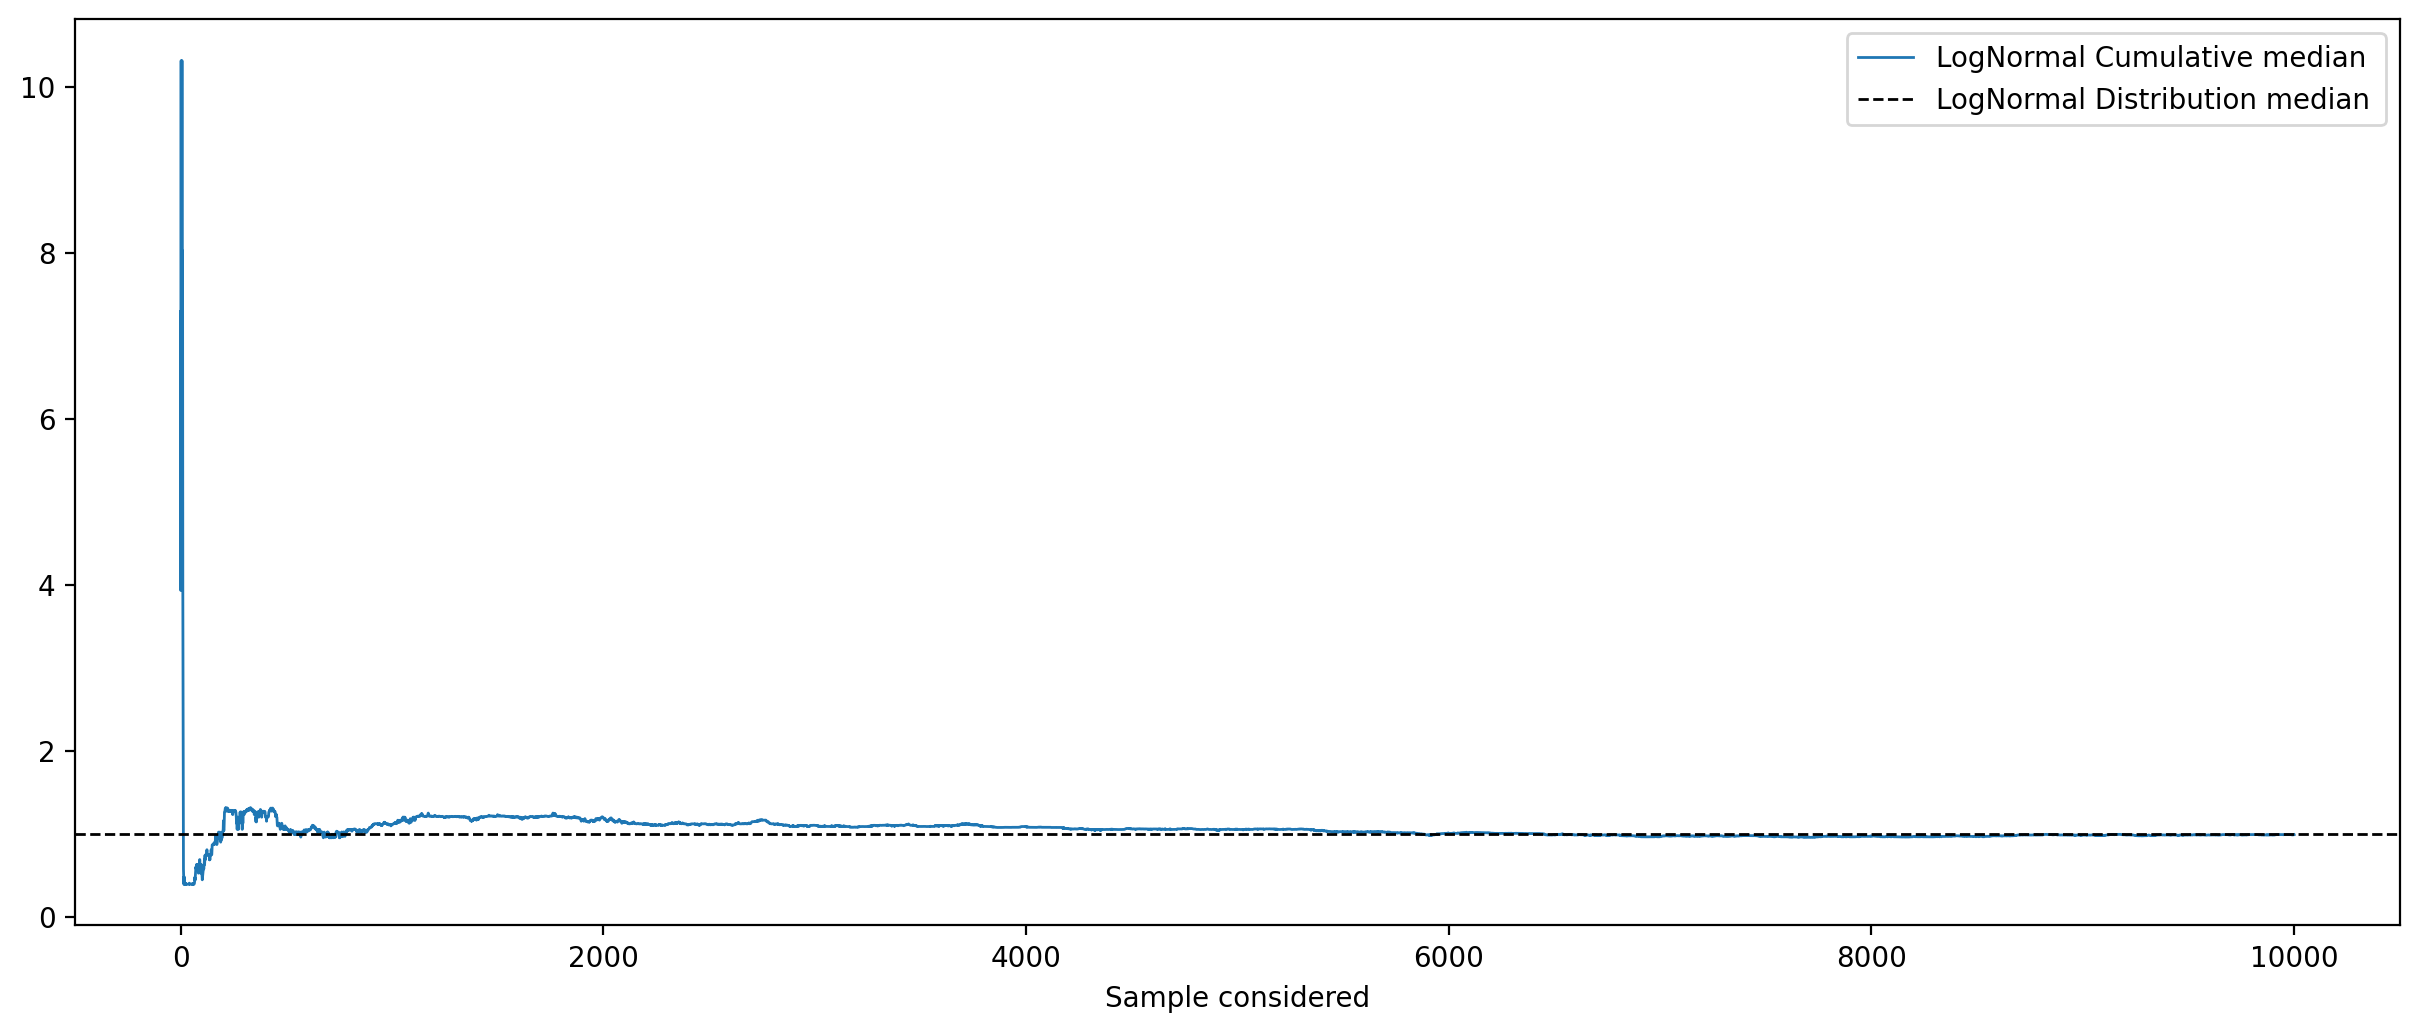

In [14]:
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,log_median,label="LogNormal Cumulative median ")
ax.axhline(median_L, color='k', linestyle='dashed', linewidth=1,label="LogNormal Distribution median")
ax.set_xlabel("Sample considered")
ax.legend()
plt.show()

### 2009 

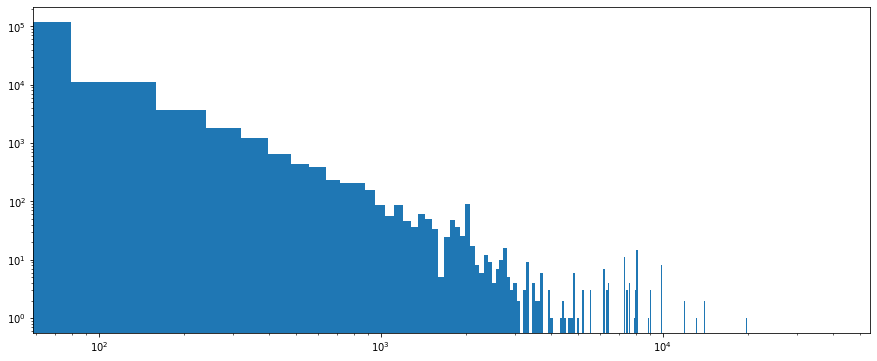

In [17]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PATH = r'C:\Users\natas\OneDrive\Skrivebord\DTU\02467 Social Informatik\2009.pkl'

with open(PATH, 'rb') as f:
    dictonary_2009 = pickle.load(f)
    
df_2009 = pd.DataFrame(dictonary_2009)
data_count=df_2009['citationCount']

#plot of citation count
x = np.linspace(min(data_count), max(data_count), 500)
plt.figure(figsize=(15,6))
plt.hist(data_count, bins=x)
plt.xscale('log')
plt.yscale('log')
plt.axis('tight')
plt.show()


# Compute the mean and standard deviation of the LogNormal distribution using the scipy.stats module
paper_df = pd.DataFrame(data_count)
paper_mean = data_count.expanding().mean()
paper_sem = data_count.expanding().sem()
paper_median = data_count.expanding().median()

data_median=df_2009['citationCount'].median()
data_mean=df_2009['citationCount'].mean()



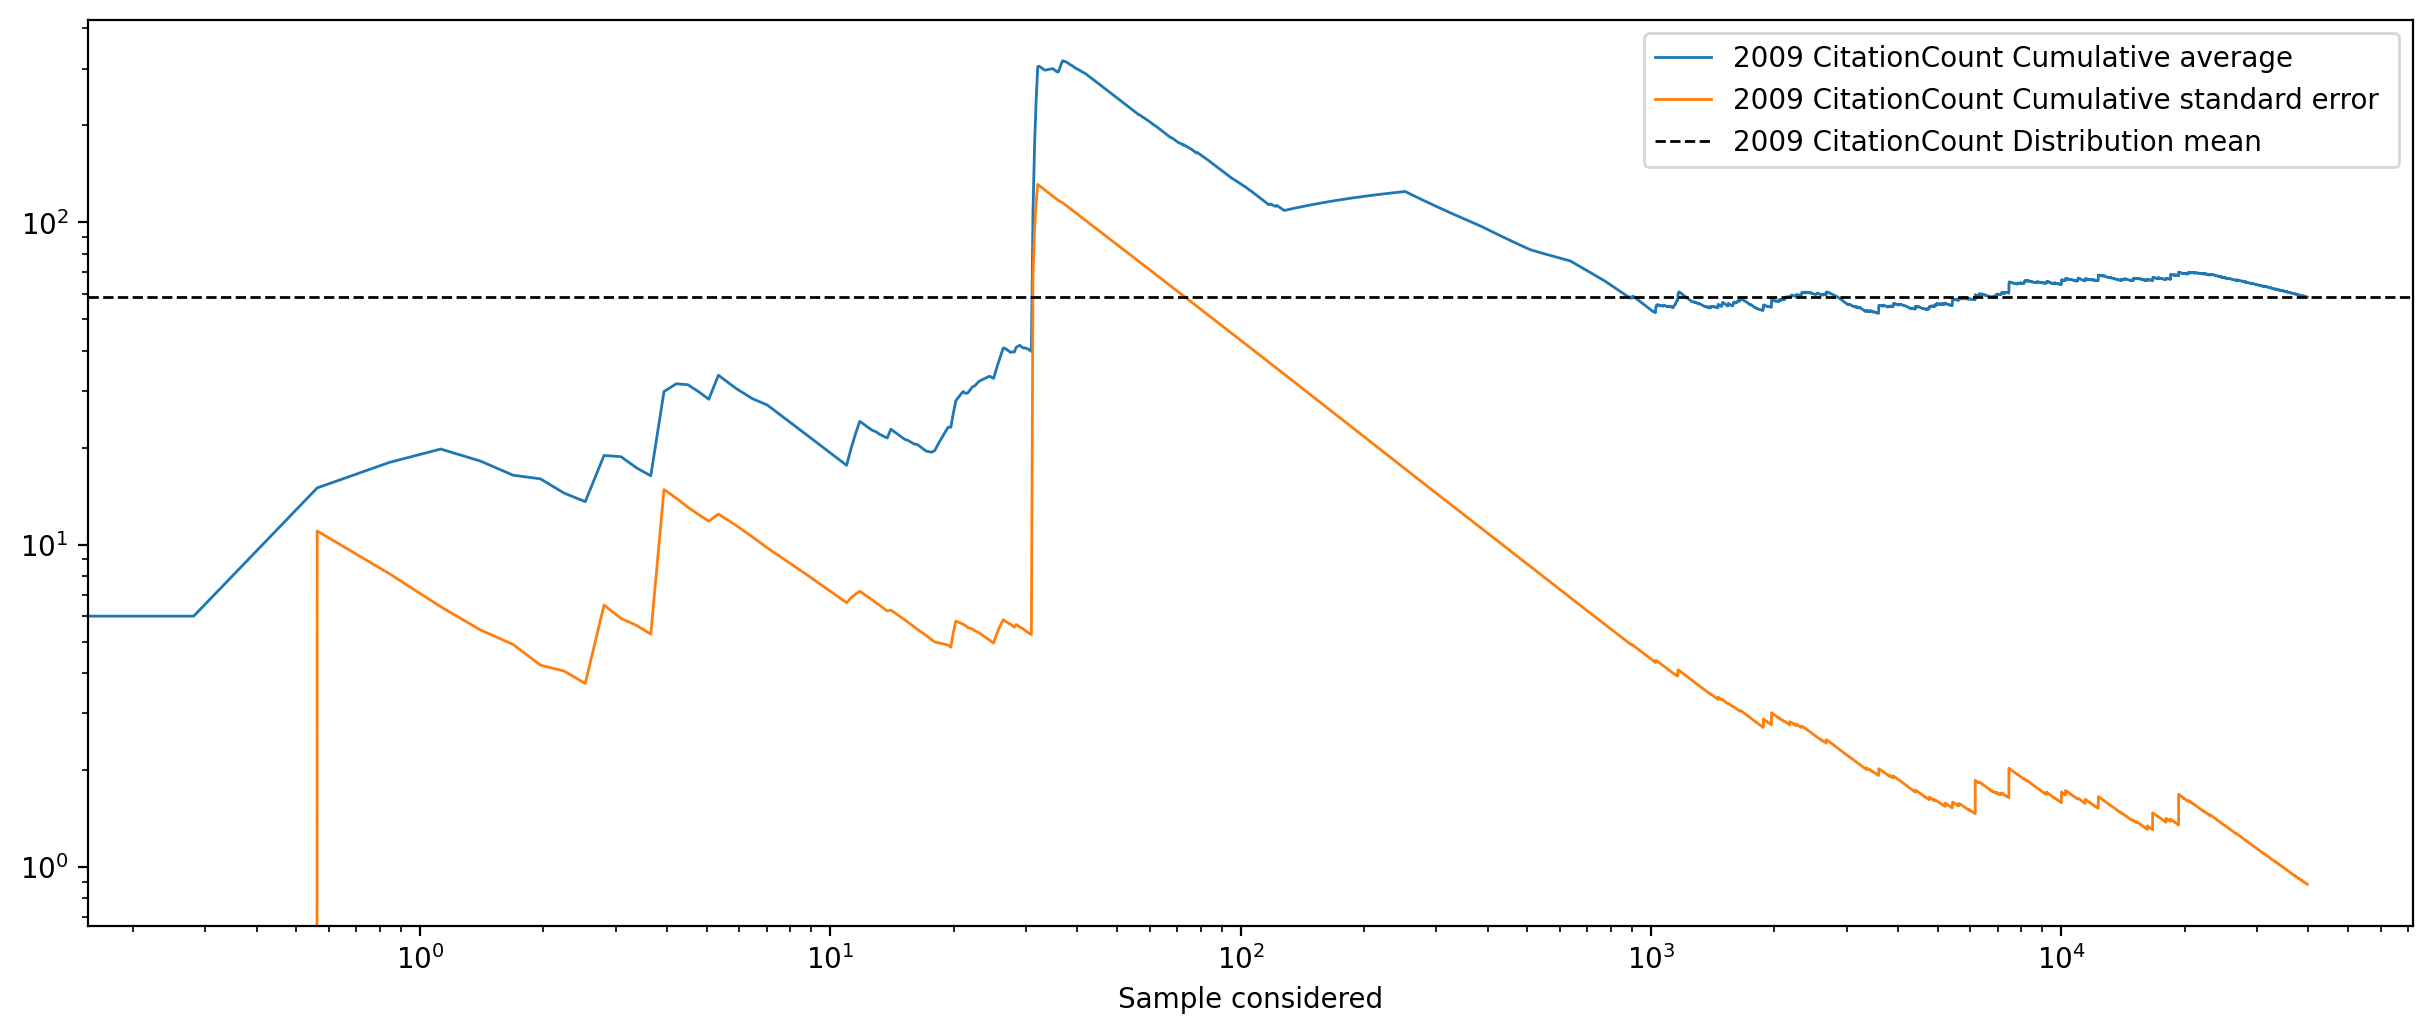

In [18]:
x_axis = np.linspace(min(data_count), max(data_count), len(data_count))
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,paper_mean,label="2009 CitationCount Cumulative average")
ax.plot(x_axis,paper_sem,label="2009 CitationCount Cumulative standard error ")
ax.axhline(data_mean, color='k', linestyle='dashed', linewidth=1, label="2009 CitationCount Distribution mean")
ax.set_xlabel("Sample considered")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()

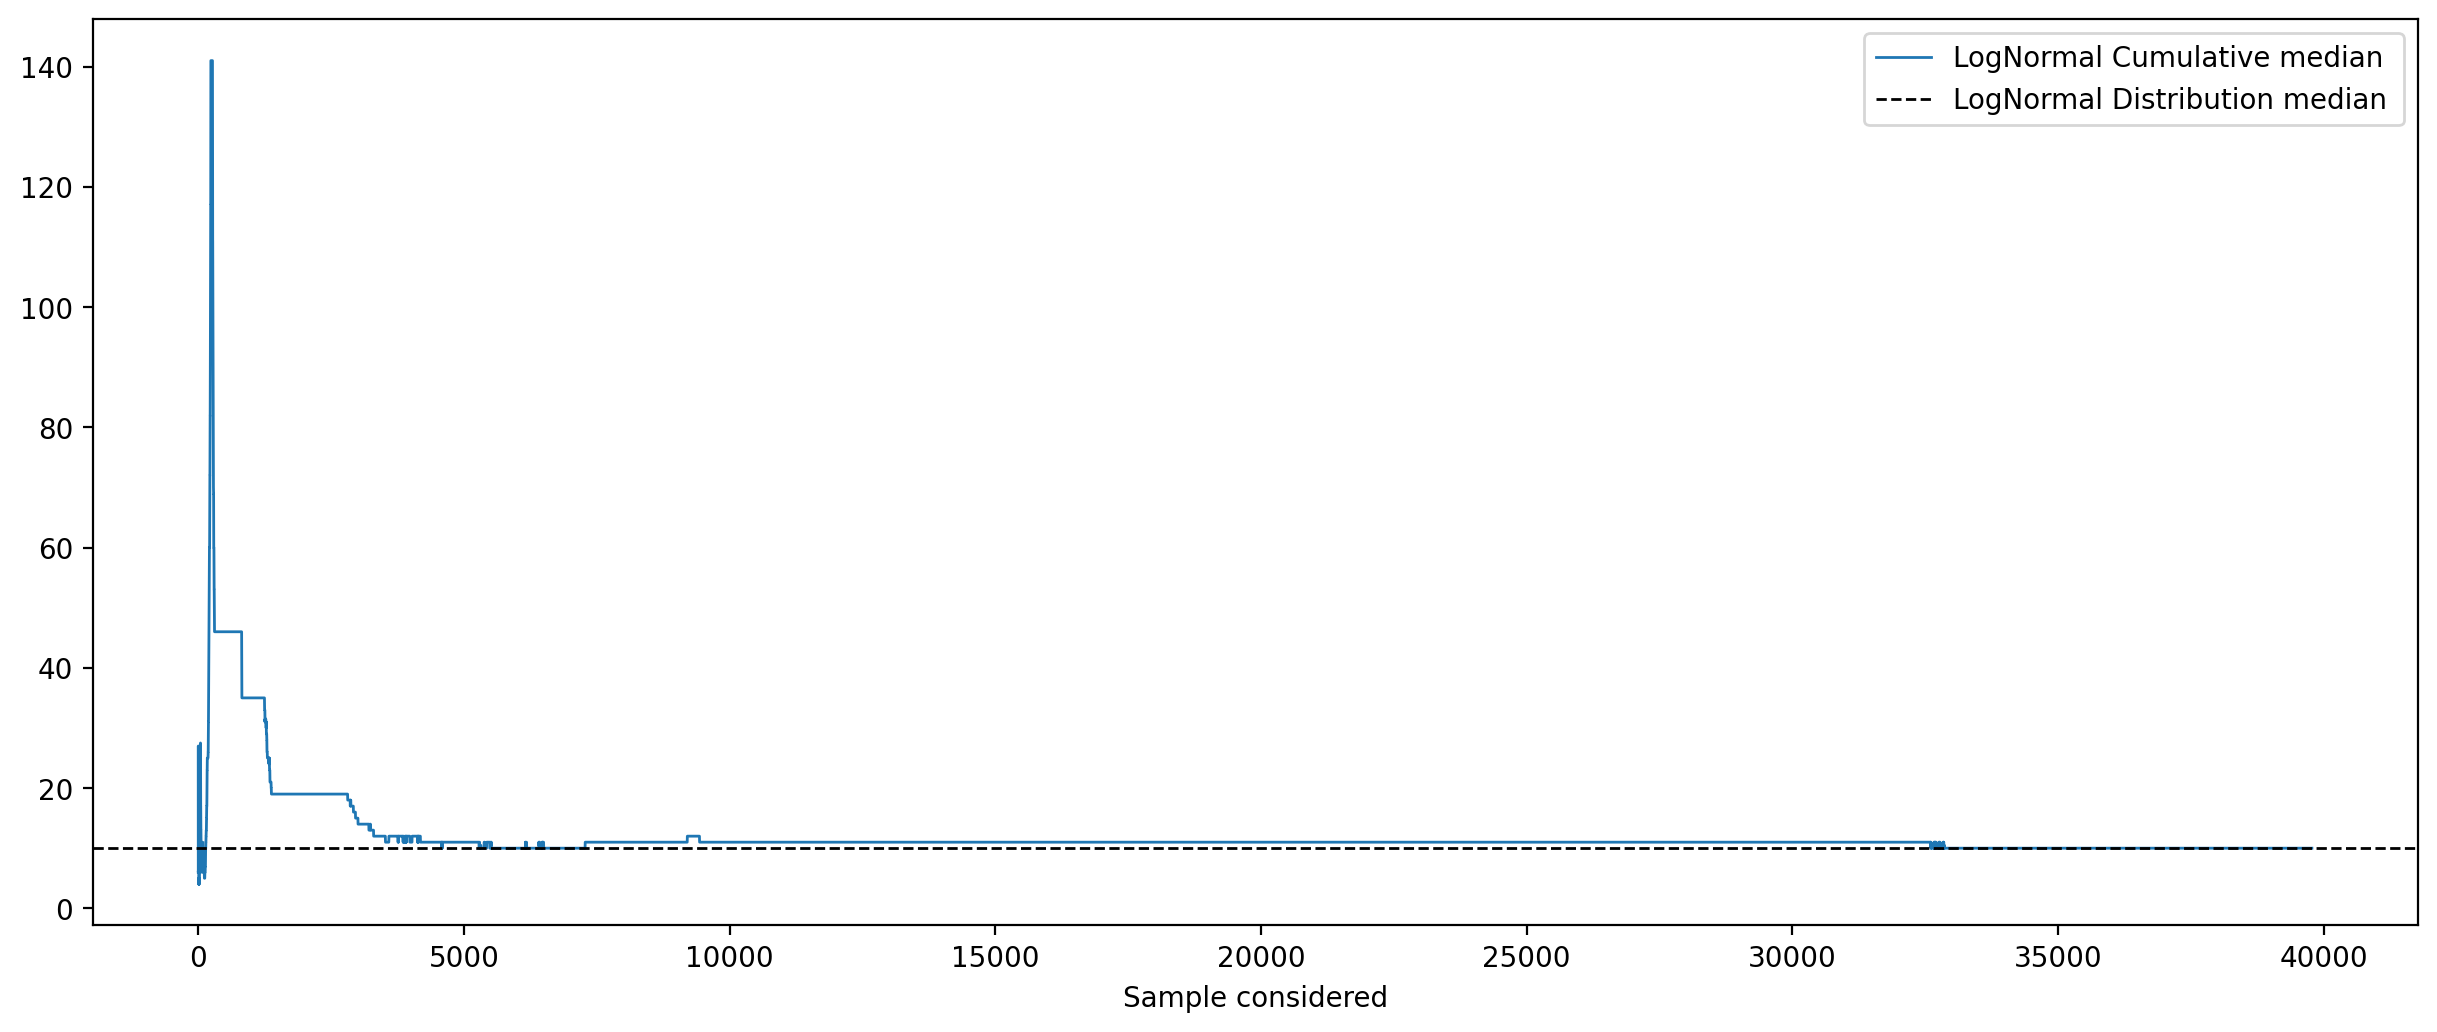

In [19]:
fig,ax=plt.subplots(figsize=(15,6), dpi=200)
ax.plot(x_axis,paper_median,label="LogNormal Cumulative median ")
ax.axhline(data_median, color='k', linestyle='dashed', linewidth=1,label="LogNormal Distribution median")
ax.set_xlabel("Sample considered")
ax.legend()
plt.show()

###### 1. Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
We observe that the more samples we consider, the closer to the theoretical value the cumultative converges.

For the pareto distribution if alpha is less than 1 then the law of large numbers dont apply. Because we expect the mean to be infinite. 



###### 2. Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?


###### 3. Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications?


###### 4. What do you think are the main take-home message of this exercise?
We think 